# Epsilon Greedy Strategy

We combine pure exploitation and pure exploration, so that the agent can exploit, but also collect information to make informed decisions. The hybrid strategy consists of acting greedily most of the time and exploring randomly every so often

In [1]:
import numpy as np

class BanditEnv:
    def __init__(self):
        self.size = 10
        self.means = np.random.randn(self.size)
        
    def step(self, action):
        return np.random.normal(loc=self.means[action])
    
env = BanditEnv()

In [2]:
def pure_exploitation(env, n_episodes=1000):
    
    # initialize the Q-function and the count array to all zeros
    Q = np.zeros((env.size), dtype=float)
    N = np.zeros((env.size), dtype=int)

    # some variables to calculate statistics and not necessary
    Qe = np.empty((n_episodes, env.size), dtype=float)
    returns = np.empty(n_episodes, dtype=float)
    actions = np.empty(n_episodes, dtype=int)
    
    # here we enter the main loop and interact with the environment
    for e in range(n_episodes):
        
        # select the action that maximizes the estimated Q-values
        action = np.argmax(Q)

        # then, pass it to the environment and receive a new reward
        reward = env.step(action)
        
        # update the counts and the Q-table
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action])/N[action]
        
        # update the statistics and start a new episode
        Qe[e] = Q
        returns[e] = reward
        actions[e] = action
        
    return returns, Qe, actions

In [3]:
def pure_exploration(env, n_episodes=1000):
    
    # The baseline boilerplate is the same as before
    Q = np.zeros((env.size), dtype=float)
    N = np.zeros((env.size), dtype=int)

    Qe = np.empty((n_episodes, env.size), dtype=float)
    returns = np.empty(n_episodes, dtype=float)
    actions = np.empty(n_episodes, dtype=int)

    for e in range(n_episodes):
        
        # always selects an action randomly
        action = np.random.randint(len(Q))
        
        reward = env.step(action)
        
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action])/N[action]
        
        Qe[e] = Q
        returns[e] = reward
        actions[e] = action
        
    return returns, Qe, actions

In [4]:
def epsilon_greedy(env, epsilon=0.01, n_episodes=1000):
    
    # The baseline boilerplate is the same as before
    Q = np.zeros((env.size), dtype=float)
    N = np.zeros((env.size), dtype=int)

    Qe = np.empty((n_episodes, env.size), dtype=float)
    returns = np.empty(n_episodes, dtype=float)
    actions = np.empty(n_episodes, dtype=int)
    
    for e in range(n_episodes):
        
        # draw a random number and compare to a hyperparameter epsilon
        if np.random.uniform() > epsilon:
            # if it is greater than epsilon, exploit:
            action = np.argmax(Q)
        else:
            # otherwise, explore:
            action = np.random.randint(len(Q))

        reward = env.step(action)
        
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action])/N[action]
        
        Qe[e] = Q
        returns[e] = reward
        actions[e] = action
    return returns, Qe, actions

We can measure the performance and the behavior of the method over 1000 time steps when applied to a simulation of the 10-armed bandit problem. Repeating this for 2000 independent runs, each with a different bandit problem, we obtain a measure of the learning algorithm’s average behavior.

In [17]:
from tqdm import tqdm

returns_exploitation = [];  # pure exploitation
returns_epsilon_01 = [];    # epsilon=0.1
returns_epsilon_001 = [];   # epsilon=0.01
returns_exploration = [];   # pure exploration

repetitions = 2000

envs = []
for i in range(repetitions):
    envs.append(BanditEnv());

for i in tqdm(range(repetitions), desc='Running pure exploitation'):
    returns, _, _ = pure_exploitation(env=envs[i], n_episodes=1000);
    returns_exploitation.append(returns);

for i in tqdm(range(repetitions), desc='Running epsilon greedy 0.1'):
    returns, _, _ = epsilon_greedy(env=envs[i], epsilon=0.1);
    returns_epsilon_01.append(returns); 

for i in tqdm(range(repetitions), desc='Running epsilon greedy 0.01'):
    returns, _, _ = epsilon_greedy(env=envs[i], epsilon=0.01);
    returns_epsilon_001.append(returns);

for i in tqdm(range(repetitions), desc='Running pure exploration'):
    returns, _, _ = pure_exploration(env=envs[i]); 
    returns_exploration.append(returns);
    
returns_exploitation = np.array(returns_exploitation);
returns_epsilon_01 = np.array(returns_epsilon_01);
returns_epsilon_001 = np.array(returns_epsilon_001);
returns_exploration = np.array(returns_exploration);

Running pure exploration: 100%|██████████| 20000/20000 [01:13<00:00, 270.56it/s]


In [18]:
# Average reward
avg_reward_exploitation = np.average(returns_exploitation, axis=0)
avg_reward_epsilon_01 = np.average(returns_epsilon_01, axis=0)
avg_reward_epsilon_001 = np.average(returns_epsilon_001, axis=0)
avg_reward_exploration = np.average(returns_exploration, axis=0)

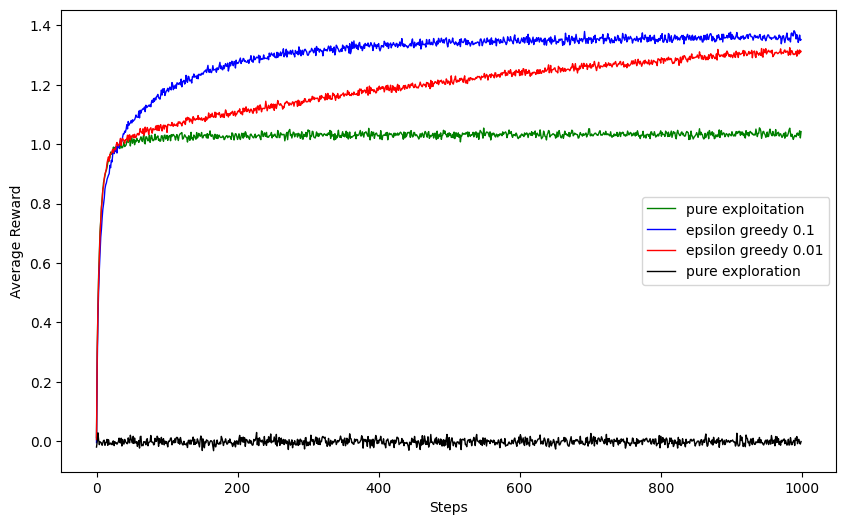

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(avg_reward_exploitation,linewidth=1, color='green', label='pure exploitation')
plt.plot(avg_reward_epsilon_01,  linewidth=1, color='blue',  label='epsilon greedy 0.1')
plt.plot(avg_reward_epsilon_001, linewidth=1, color='red',   label='epsilon greedy 0.01')
plt.plot(avg_reward_exploration, linewidth=1, color='black', label='pure exploration')
plt.xlabel('Steps');
plt.ylabel('Average Reward')
plt.legend()

plt.show()

We can plot Q value in order to check if they are estimated correctly:

In [20]:
_, Q, _ = epsilon_greedy(env=env, epsilon=0.5, n_episodes=10000)

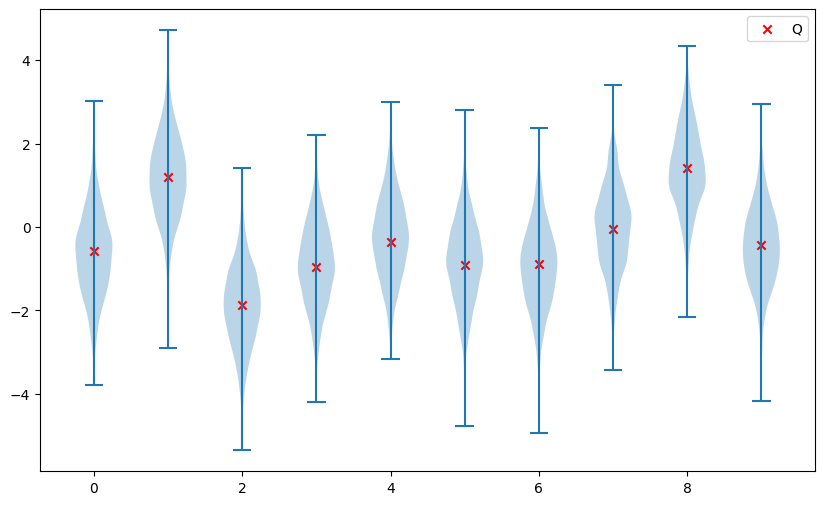

In [21]:
plt.figure(figsize=(10,6))
plt.violinplot(np.random.randn(2000, 10) + env.means, positions=range(env.size))
plt.scatter(range(env.size), Q[9999], color='red', marker='x', label='Q')
plt.legend();